# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree

In [2]:
data = pd.read_excel("D:/Assignments/Decision Tree/Decision Tree/heart_disease.xlsx",sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [11]:
data["num"].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [13]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [15]:
df = data.dropna(axis=0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


<Axes: >

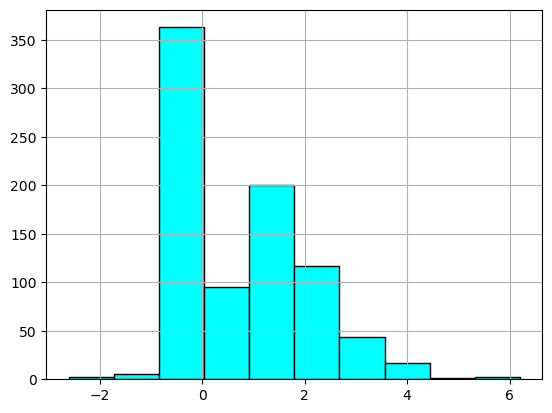

In [19]:
df["oldpeak"].hist(color='cyan',edgecolor='k')

In [23]:
df.shape

(846, 13)

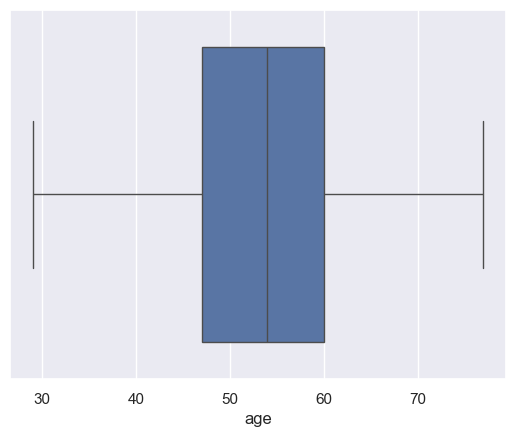

In [25]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=df['age'])
plt.show()

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    object 
 2   cp        846 non-null    object 
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    bool   
 6   restecg   846 non-null    object 
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    object 
 11  thal      846 non-null    object 
 12  num       846 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.7+ KB


In [31]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
901,51,110,0,92,0.0,4
902,62,160,254,108,3.0,4
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4


In [33]:
numeric_df.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.244301,-0.107471,-0.345960,0.242662,0.331399
trestbps,0.244301,1.000000,0.100912,-0.109390,0.167131,0.126158
chol,-0.107471,0.100912,1.000000,0.224456,0.029898,-0.256191
thalch,-0.345960,-0.109390,0.224456,1.000000,-0.139598,-0.350331
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.331399,0.126158,-0.256191,-0.350331,0.437577,1.000000


In [35]:
df[["age","trestbps","chol","thalch","oldpeak",'num']].corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.244301,-0.107471,-0.345960,0.242662,0.331399
trestbps,0.244301,1.000000,0.100912,-0.109390,0.167131,0.126158
chol,-0.107471,0.100912,1.000000,0.224456,0.029898,-0.256191
thalch,-0.345960,-0.109390,0.224456,1.000000,-0.139598,-0.350331
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.331399,0.126158,-0.256191,-0.350331,0.437577,1.000000


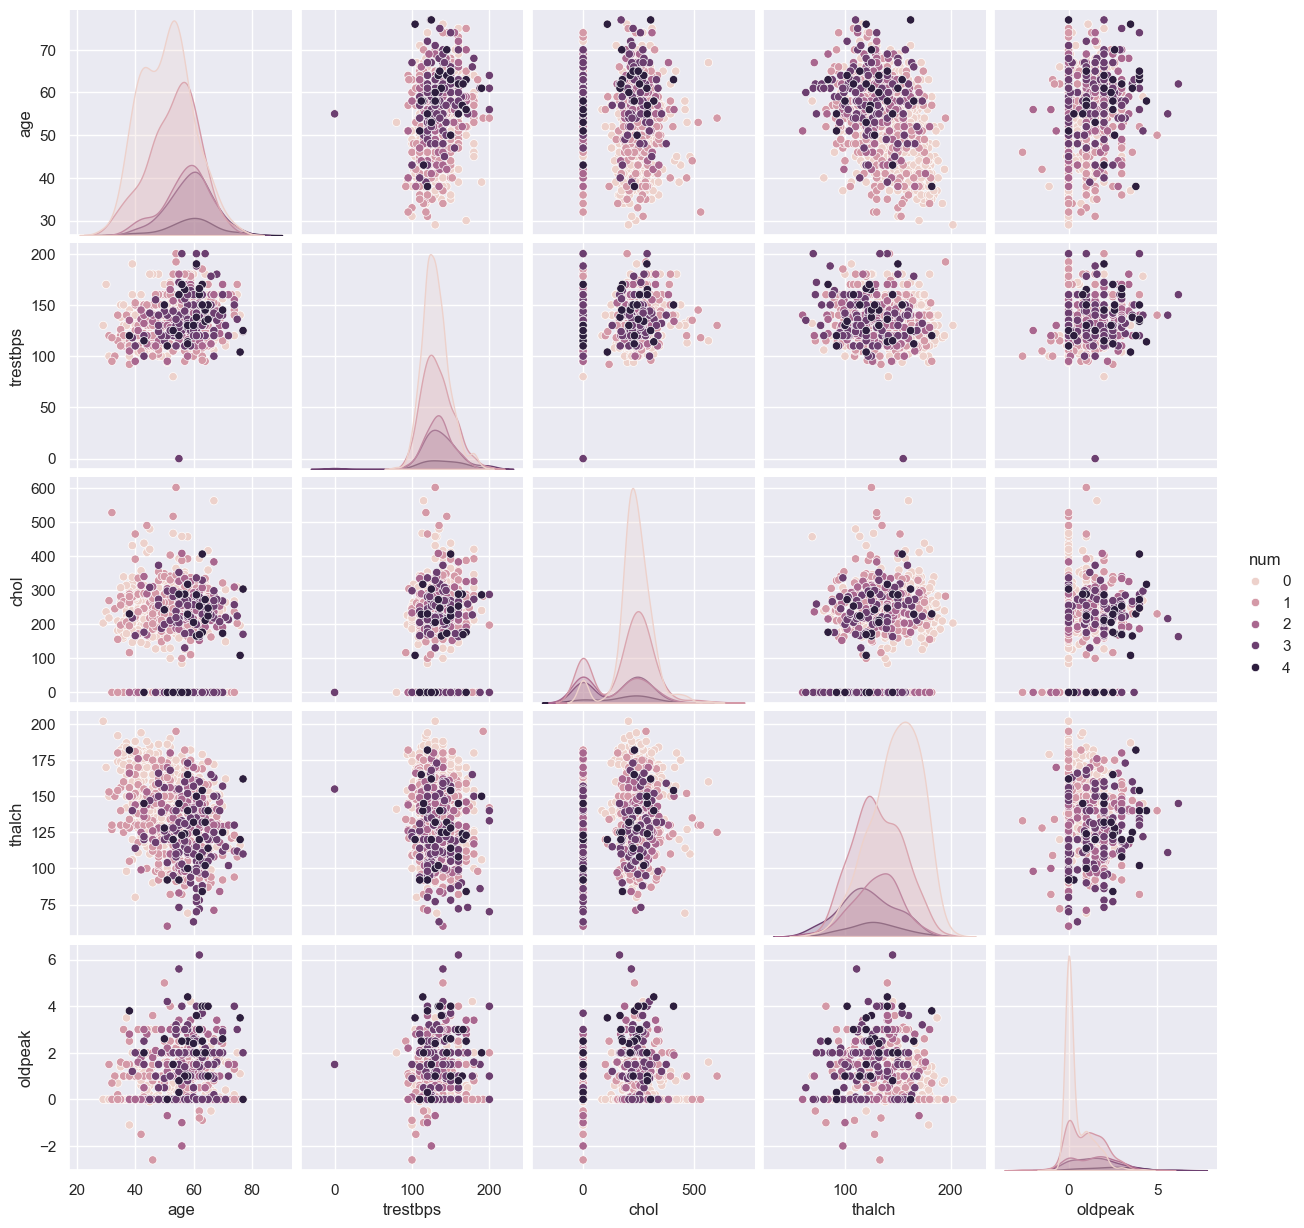

In [37]:
import seaborn as sns
sns.pairplot(data=df[["age","trestbps","chol","thalch","oldpeak",'num']], hue = 'num')

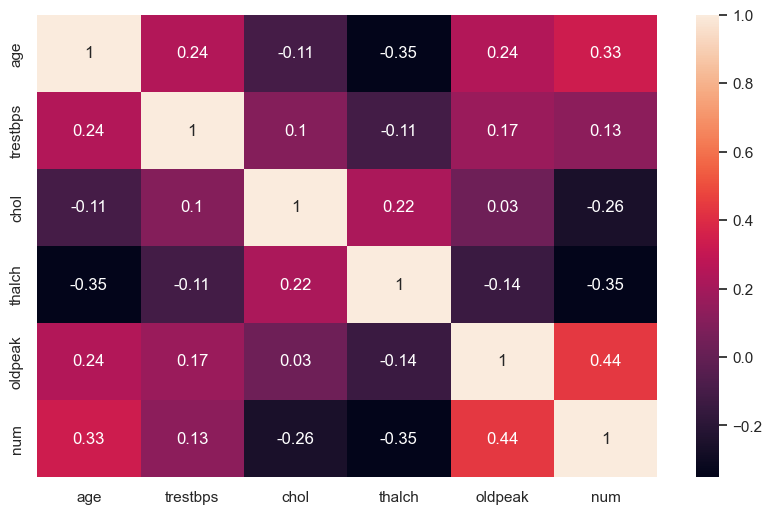

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["age","trestbps","chol","thalch","oldpeak",'num']].corr(),annot=True)
plt.show()

In [41]:
df["sex"].value_counts()

sex
Male      657
Female    189
Name: count, dtype: int64

In [43]:
df["cp"].value_counts()

cp
asymptomatic       464
non-anginal        184
atypical angina    158
typical angina      40
Name: count, dtype: int64

In [45]:
df["fbs"].value_counts()

fbs
False    688
True     158
Name: count, dtype: int64

In [47]:
df["restecg"].value_counts()

restecg
normal              520
lv hypertrophy      180
st-t abnormality    146
Name: count, dtype: int64

In [49]:
df["exang"].value_counts()

exang
False    512
True     333
FALSE      1
Name: count, dtype: int64

In [51]:
df.shape

(846, 13)

# prompt: drop that row which contains exang == "FALSE" from the df

In [54]:
df = df.drop(df[df['exang'] == "FALSE"].index)

In [56]:
df["exang"].value_counts()

exang
False    512
True     333
Name: count, dtype: int64

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [60]:
df["slope"].value_counts()

slope
flat           425
upsloping      275
downsloping    145
Name: count, dtype: int64

In [62]:
df["thal"].value_counts()

thal
normal               364
reversable defect    323
fixed defect         158
Name: count, dtype: int64

In [64]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

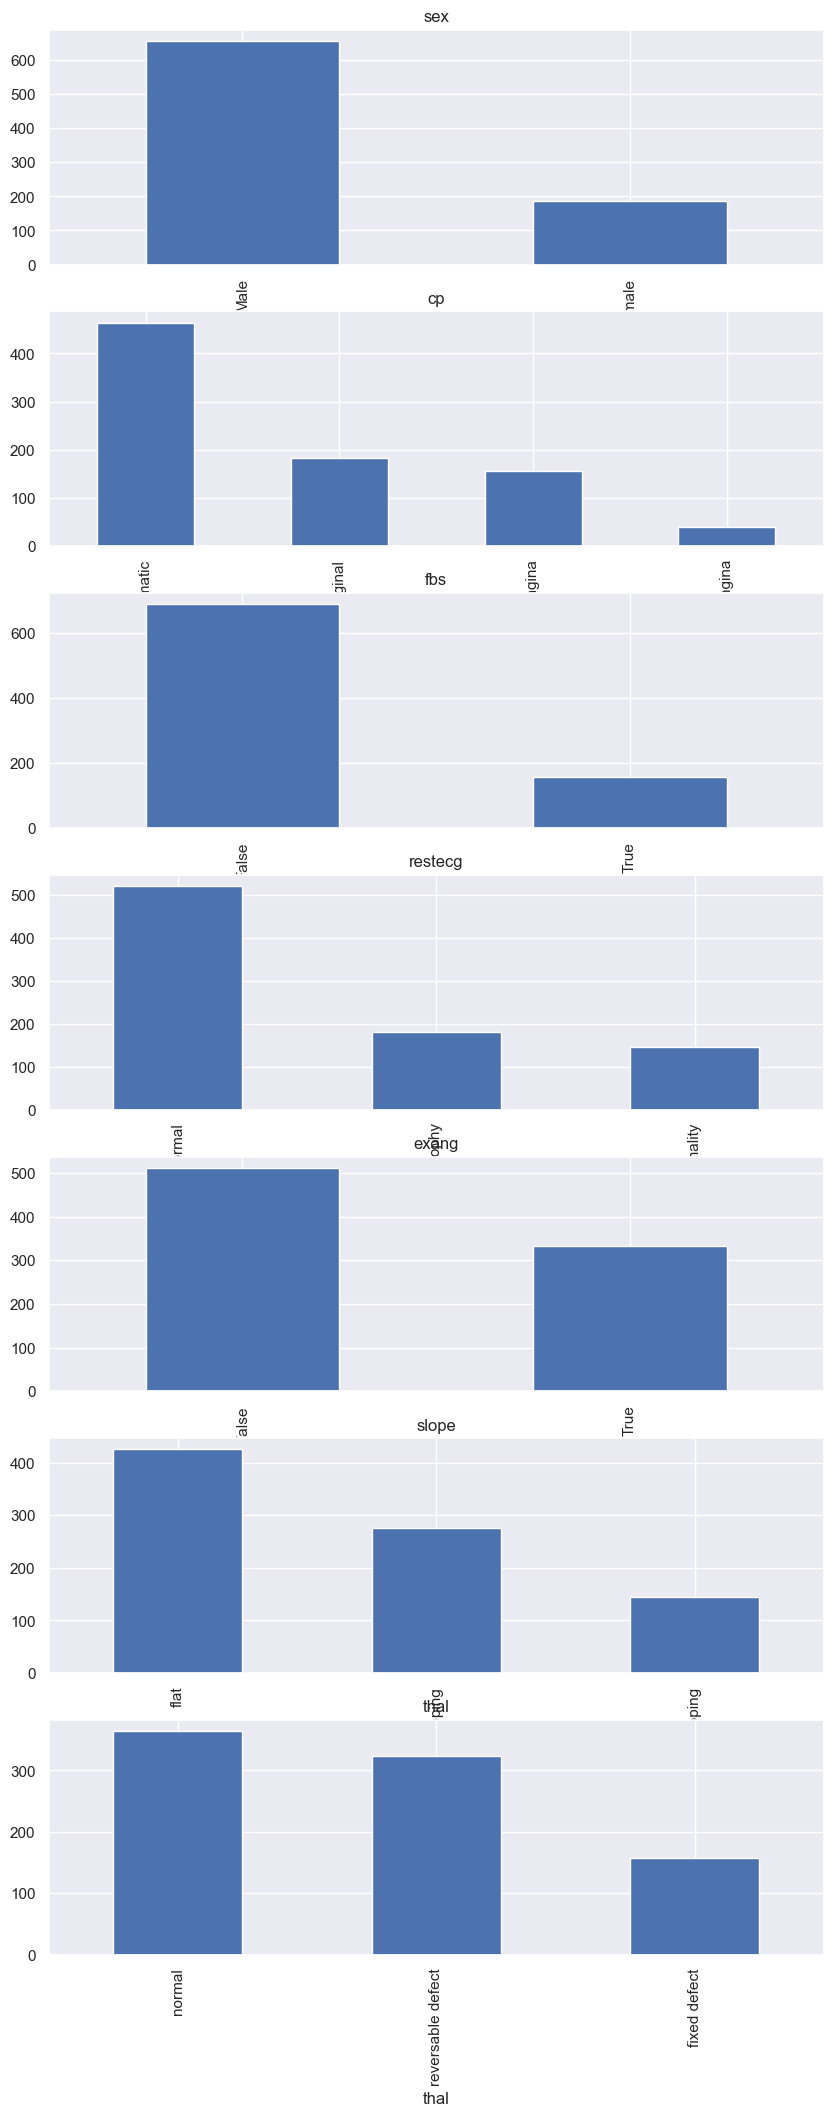

In [66]:
fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(10, 25))

# Plot bar plots for each categorical variable
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(col)
plt.show()

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [70]:
numeric_df

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
901,51,110,0,92,0.0,4
902,62,160,254,108,3.0,4
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4


In [72]:
numerical_features = ['age', 'trestbps','chol','thalch','oldpeak']

# Standard Scaler

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [77]:
df.shape

(845, 13)

In [79]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["sex"] = LE.fit_transform(df["sex"])
df["cp"] = LE.fit_transform(df["cp"])
df["fbs"] = LE.fit_transform(df["fbs"])
df["restecg"] = LE.fit_transform(df["restecg"])
df["exang"] = LE.fit_transform(df["exang"])
df["slope"] = LE.fit_transform(df["slope"])
df["thal"] = LE.fit_transform(df["thal"])

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.051743,1,3,0.657512,0.273060,1,0,0.500595,0,1.289835,0,0,0
1,-1.366550,1,1,0.135971,0.004231,0,1,-0.202392,0,-0.814063,1,0,0
2,0.392208,1,0,0.396742,-0.094339,0,1,0.422486,0,-0.448168,1,0,0
3,-0.157404,1,3,-0.750649,-0.148105,0,0,2.062790,0,-0.814063,1,0,0
4,0.392208,1,0,-1.167882,-0.013691,0,1,-0.436721,1,0.558044,1,0,0


In [83]:
x = df[["age","sex","cp","trestbps","chol","fbs","restecg","thalch","exang","oldpeak","slope","thal"]]
y = df["num"]

In [85]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.051743,1,3,0.657512,0.273060,1,0,0.500595,0,1.289835,0,0
1,-1.366550,1,1,0.135971,0.004231,0,1,-0.202392,0,-0.814063,1,0
2,0.392208,1,0,0.396742,-0.094339,0,1,0.422486,0,-0.448168,1,0
3,-0.157404,1,3,-0.750649,-0.148105,0,0,2.062790,0,-0.814063,1,0
4,0.392208,1,0,-1.167882,-0.013691,0,1,-0.436721,1,0.558044,1,0


# Train Test Split

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
ac1 = accuracy_score(y_train,y_pred_train)
a1=round(ac1,2)
print(f"Training accuracy: {a1}")
ac2 = accuracy_score(y_test,y_pred_test)
a2=round(ac2,2)
print(f"Test accuracy: {a2}")

Training accuracy: 1.0
Test accuracy: 0.54


# prompt: change the min_samples_split by writing a code and try to improvise the model's performance

# Change the min_samples_split parameter to 5

In [97]:
dt = DecisionTreeClassifier(min_samples_leaf=25,max_depth=10,max_features=13,criterion='gini',splitter='random')

# Fit the model
dt.fit(x_train, y_train)

# Predict on the training and test sets
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Evaluate the model's performance
ac1 = accuracy_score(y_train, y_pred_train)
a1=round(ac1,2)
ac2 = accuracy_score(y_test, y_pred_test)
a2=round(ac2,2)

# Print the results
print("Training accuracy:", a1)
print("Test accuracy:", a2)

Training accuracy: 0.6
Test accuracy: 0.5


# Create a new decision tree classifier with max_depth set to 5

In [104]:
dt = DecisionTreeClassifier(max_depth=6)

# Fit the new decision tree classifier on the training data
dt.fit(x_train, y_train)

# Predict the class labels for the training and test data
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Calculate the accuracy score for the training and test data
ac1 = accuracy_score(y_train, y_pred_train)
a1=round(ac1,2)
print("Training accuracy:", a1)

ac2 = accuracy_score(y_test, y_pred_test)
a2=round(ac2,2)
print("Test accuracy:", a2)

Training accuracy: 0.74
Test accuracy: 0.54


### prompt: use the grid search cv method for the above dt model, min_samples_leaf ,max_depth ,max_features ,criterion='gini',splitter='random' and fit a best fit model where i can see less variance and highest test accuracy

In [107]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
grid = {
    'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'max_features': [10, 11, 12, 13, 14, 15],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Instantiate the grid search object
grid_search = GridSearchCV(estimator=dt, param_grid=grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:")
print(best_params)

# Create a new decision tree classifier with the best hyperparameters
dt_best = DecisionTreeClassifier(**best_params)

# Fit the new decision tree classifier on the training data
dt_best.fit(x_train, y_train)

# Predict the class labels for the training and test data
y_pred_train = dt_best.predict(x_train)
y_pred_test = dt_best.predict(x_test)

# Calculate the accuracy score for the training and test data
ac1 = accuracy_score(y_train, y_pred_train)
a1=round(ac1,2)
print("Training accuracy:", a1)

ac2 = accuracy_score(y_test, y_pred_test)
a2=round(ac2,2)
print("Test accuracy:", a2)

Best hyperparameters:
{'criterion': 'gini', 'max_depth': 14, 'max_features': 11, 'min_samples_leaf': 25, 'splitter': 'best'}
Training accuracy: 0.61
Test accuracy: 0.53


# Next Calculate precision

In [110]:
precision = precision_score(y_train, y_pred_train, average='macro')
print("Precision:", precision)

precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)

Precision: 0.30746817923112746
Precision: 0.23318367346938773


# Calculate recall

In [113]:
recall = recall_score(y_train, y_pred_train, average='macro')
print("Recall:", recall)

recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)

Recall: 0.3428346910602406
Recall: 0.2671540616246499


# Calculate F1-score

In [116]:
f1 = f1_score(y_train, y_pred_train, average='macro')
print("F1-score:", f1)

f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)

F1-score: 0.3133154640445737
F1-score: 0.24036090225563908


In [118]:
from sklearn.metrics import roc_curve,roc_auc_score

df["Y_proba"] = dt_best.predict_proba(x)[:,1]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,Y_proba
0,1.051743,1,3,0.657512,0.273060,1,0,0.500595,0,1.289835,0,0,0,0.153846
1,-1.366550,1,1,0.135971,0.004231,0,1,-0.202392,0,-0.814063,1,0,0,0.040000
2,0.392208,1,0,0.396742,-0.094339,0,1,0.422486,0,-0.448168,1,0,0,0.166667
3,-0.157404,1,3,-0.750649,-0.148105,0,0,2.062790,0,-0.814063,1,0,0,0.000000
4,0.392208,1,0,-1.167882,-0.013691,0,1,-0.436721,1,0.558044,1,0,0,0.300000


In [120]:
print("The number of nodes in the tree is:", dt_best.tree_.node_count)
print("The depth of the tree is:", dt_best.tree_.max_depth)

The number of nodes in the tree is: 35
The depth of the tree is: 6


+ # Bagging classifer
+ # Cross validation method

In [123]:
from sklearn.ensemble import BaggingClassifier
dt_model = BaggingClassifier(max_features=0.7,max_samples=0.6)

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.92
Cross validation Test score:  0.55


+ # Random forest classifer
+ # Cross validation method

In [126]:
from sklearn.ensemble import RandomForestClassifier
dt_model = RandomForestClassifier(max_features=0.7,max_samples=0.6)

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.99
Cross validation Test score:  0.57


+ # Adaboost classifer
+ # Cross validation method

In [129]:
from sklearn.ensemble import AdaBoostClassifier
dt_model = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.6
Cross validation Test score:  0.55


+ # Xgboost classifier
+ # Cross validation method

In [136]:
!pip install xgboost

In [131]:
from xgboost import XGBClassifier
dt_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500,reg_lambda=1,gamma=10)


training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.59
Cross validation Test score:  0.58


In [135]:
dt_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500,reg_lambda=1,gamma=10)
dt_model.fit(x_train,y_train)
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)

ac1 = accuracy_score(y_train,y_pred_train)
a1 = round(ac1,2)
print("Training accuracy:", a1)

ac2 = accuracy_score(y_test,y_pred_test)
a2 = round(ac2,2)
print("Test accuracy:", a2)

# Calculate precision
precision = precision_score(y_train, y_pred_train, average='macro')
print("Precision:", precision)

precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)
# Calculate recall
recall = recall_score(y_train, y_pred_train, average='macro')
print("Recall:", recall)

recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)
# Calculate F1-score
f1 = f1_score(y_train, y_pred_train, average='macro')
print("F1-score:", f1)

f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)

Training accuracy: 0.61
Test accuracy: 0.57
Precision: 0.23861392988929891
Precision: 0.21729832331540652
Recall: 0.3246201550387597
Recall: 0.2824425770308123
F1-score: 0.27425015904541716
F1-score: 0.24519104084321475


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 150, 200, 500],
    'reg_lambda': [0.1, 1, 10],
    'gamma': [1, 10]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_model = XGBClassifier(**best_params)
best_model.fit(x_train, y_train)

y_pred_test = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy with best parameters:", accuracy)

# Interview questions

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

The hyperparameters of a decision tree include the maximum size of the tree,
the minimum number of instances required in a node for inducing a split, the node splitting criterion, and the amount of pruning.
These hyperparameters play a crucial role in determining the performance of the decision tree model

# 2. What is the difference between the Label encoding and One-hot encoding?

### Label Encoding:
+ Objective: Convert non-numerical data (like categories or labels) into numerical data.
+ Method: Assign each unique category a numeric value based on alphabetical order or some other arbitrary scheme.
+ Example: Suppose we have a categorical variable called “Team” with three unique values: A, B, and C.
Using label encoding:
A → 0
B → 1
C → 2
+ Pros:
Simple and straightforward.
Preserves the ordinal relationship if it exists (e.g., low, medium, high).
+ Cons:
Implies a ranking between values, which might not be appropriate for all categorical variables.
Can mislead algorithms into thinking there’s a meaningful numeric relationship.